In [171]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('diabetes').getOrCreate()
df = spark.read.csv('Datasets/diabetes_012_health_indicators_BRFSS2015.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: string (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: string (nullable = true)
 |-- Fruits: string (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: string (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: decimal(10,0) (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)



In [172]:
# extracting number of rows from the Dataframe
rows = df.count()

# extracting number of columns from the Dataframe
cols = len(df.columns)

#printing
print("DataFrame Rows Count : %(rows)s" % {'rows': rows})
print("DataFrame Columns Count : %(cols)s" % {'cols': cols})

DataFrame Rows Count : 253680
DataFrame Columns Count : 22


In [3]:
df.show()

+------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|           0|     1|       1|        1| 40|     1|     0|                   0|           0|     0|      1|                0|            1|          1|      5|      18|      15|       1|  0|  9|        4|     3|
|           0|     0|       0|        0| 25|     1|     0|                   0|           1|     0|      0|                0|            0|          1| 

In [173]:
fields = ['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 
          'PhysActivity', 'Fruits', 'Veggies', 'Sex', 'Age', 'Education', 'Income']
df.select(fields).show()

+------------+------+--------+---+------+------+------------+------+-------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|PhysActivity|Fruits|Veggies|Sex|Age|Education|Income|
+------------+------+--------+---+------+------+------------+------+-------+---+---+---------+------+
|           0|     1|       1| 40|     1|     0|           0|     0|      1|  0|  9|        4|     3|
|           0|     0|       0| 25|     1|     0|           1|     0|      0|  0|  7|        6|     1|
|           0|     1|       1| 28|     0|     0|           0|     1|      0|  0|  9|        4|     8|
|           0|     1|       0| 27|     0|     0|           1|     1|      1|  0| 11|        3|     6|
|           0|     1|       1| 24|     0|     0|           1|     1|      1|  0| 11|        5|     4|
|           0|     1|       1| 25|     1|     0|           1|     1|      1|  1| 10|        6|     8|
|           0|     1|       0| 30|     1|     0|           0|     0|      0|  0|  

In [174]:
# import PySpark Audit function
from PySparkAudit import auditing
print(auditing(df, display=True))

The audited results summary audited_results.xlsx was located at:
C:\Users\mvpka\Desktop\BDAS/Audited
Caution: no numerical features in the dataset!!!
Caution: no categorical features in the dataset!!!
Caution: no date features in the dataset!!!
Generate all audited results took = 12.245630264282227 s
The auditing processes are DONE!!!
([], [], [])


In [175]:
from PySparkAudit import counts
counts(df)

,feature,row_count,notnull_count,distinct_count
0,Diabetes_012,253680,253679,5
1,HighBP,253680,253676,2
2,HighChol,253680,253680,2
3,CholCheck,253680,253680,2
4,BMI,253680,253680,86
5,Smoker,253680,253680,2
6,Stroke,253680,253680,2
7,HeartDiseaseorAttack,253680,253680,2
8,PhysActivity,253680,253680,4
9,Fruits,253680,253680,6


In [7]:
from PySparkAudit import describe
describe(df)

summary,count,mean,stddev,min,max
feature,,,,,
Diabetes_012,253679,0.29732457160427156,0.7251625431058498,0,99
HighBP,253676,0.4290039262681531,0.4949348675916185,0,1
HighChol,253680,0.4241209397666351,0.49420980465688374,0,1
CholCheck,253680,0.9626695048880479,0.1895707543627258,0,1
BMI,253680,28.38263317026636,6.610189876953577,12,save
Smoker,253680,0.44316855881425415,0.49676066677856384,0,1
Stroke,253680,0.04057079785556607,0.19729409940016238,0,1
HeartDiseaseorAttack,253680,0.09418558814254178,0.2920873147507548,0,1
PhysActivity,253680,0.7565417576612872,0.4291701907662982,0,t


In [176]:
from pyspark.sql.functions import *
grouped = df.groupBy('Diabetes_012') \
            .count().sort(desc("count")) \
            .withColumnRenamed("count","number")
grouped.show()

+------------+------+
|Diabetes_012|number|
+------------+------+
|           0|213700|
|           2| 35346|
|           1|  4631|
|          99|     1|
|        null|     1|
|           3|     1|
+------------+------+



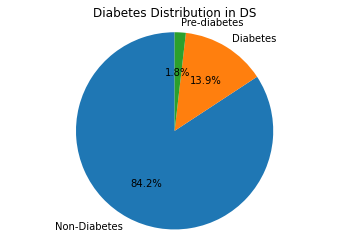

In [177]:
import matplotlib.pyplot as plt
diabetes=grouped.select('number').rdd.map(lambda x: x[0]).take(3)
label = ['Non-Diabetes', 'Diabetes', 'Pre-diabetes']
plt.pie(diabetes, labels=label, autopct='%1.1f%%', explode=[0,0,0], shadow=False, startangle=90)
plt.title('Diabetes Distribution in DS')
plt.axis('equal')
plt.show()

In [178]:
from pyspark.sql.functions import monotonically_increasing_id
selected20Rows = df.select(fields).withColumn("index", monotonically_increasing_id())
from pyspark.sql.functions import col
selected20Rows.where(col("index").between(20, 40)).show()

+------------+------+--------+---+------+------+------------+------+-------+------+---+---------+------+-----+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|PhysActivity|Fruits|Veggies|   Sex|Age|Education|Income|index|
+------------+------+--------+---+------+------+------------+------+-------+------+---+---------+------+-----+
|           0|     1|       1| 22|     0|     1|           0|     1|      0|     0| 12|        4|     4|   20|
|           0|     1|       1| 38|     1|     0|           0|     1|      1|     0| 13|        2|     3|   21|
|           0|     0|       0| 28|     1|     0|           0|     0|      1|     1|  5|        5|     5|   22|
|           2|     1|       0| 27|     0|     0|           1|     1|      1|     0| 13|        5|     4|   23|
|           0|     1|       1| 28|     1|     0|           0|     1|      1|     0|  9|        4|     6|   24|
|           0|     0|       0| 32|     0|     0|           1|     1|      1|     0|  5|        6|     8|   25|
|

In [13]:
from PySparkAudit import dtypes_class
dtypes_class(df)

(                 feature           DataType
 0           Diabetes_012      IntegerType()
 1                 HighBP      IntegerType()
 2               HighChol      IntegerType()
 3              CholCheck      IntegerType()
 4                    BMI       StringType()
 5                 Smoker      IntegerType()
 6                 Stroke      IntegerType()
 7   HeartDiseaseorAttack      IntegerType()
 8           PhysActivity       StringType()
 9                 Fruits       StringType()
 10               Veggies      IntegerType()
 11     HvyAlcoholConsump      IntegerType()
 12         AnyHealthcare      IntegerType()
 13           NoDocbcCost       StringType()
 14               GenHlth      IntegerType()
 15              MentHlth      IntegerType()
 16              PhysHlth      IntegerType()
 17              DiffWalk      IntegerType()
 18                   Sex       StringType()
 19                   Age  DecimalType(10,0)
 20             Education      IntegerType()
 21       

In [179]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show(vertical=True)

-RECORD 0-------------------
 Diabetes_012         | 1   
 HighBP               | 4   
 HighChol             | 0   
 CholCheck            | 0   
 BMI                  | 0   
 Smoker               | 0   
 Stroke               | 0   
 HeartDiseaseorAttack | 0   
 PhysActivity         | 0   
 Fruits               | 0   
 Veggies              | 0   
 HvyAlcoholConsump    | 0   
 AnyHealthcare        | 1   
 NoDocbcCost          | 1   
 GenHlth              | 0   
 MentHlth             | 0   
 PhysHlth             | 0   
 DiffWalk             | 1   
 Sex                  | 0   
 Age                  | 0   
 Education            | 3   
 Income               | 1   



In [16]:
errorData = df.filter(~df.Diabetes_012.isin([0,1,2]) |  df.Diabetes_012.isNull() |
          ~df.HighBP.isin([0,1]) | df.HighBP.isNull() |
          ~df.HighChol.isin([0,1]) | df.HighChol.isNull() |
          ~df.CholCheck.isin([0,1]) | df.CholCheck.isNull() |
          ~df.Smoker.isin([0,1]) | df.Smoker.isNull() |
          ~df.Stroke.isin([0,1]) | df.Stroke.isNull() |
          ~df.HeartDiseaseorAttack.isin([0,1]) | df.HeartDiseaseorAttack.isNull() |
          ~df.PhysActivity.isin([0,1]) | df.PhysActivity.isNull() |
          ~df.Veggies.isin([0,1]) | df.Veggies.isNull() |
          ~df.Fruits.isin([0,1]) | df.Fruits.isNull() |
          ~df.BMI.between(0,98) | df.BMI.isNull() |
          ~df.HvyAlcoholConsump.isin([0,1]) | df.HvyAlcoholConsump.isNull() |
          ~df.AnyHealthcare.isin([0,1]) | df.AnyHealthcare.isNull() |
          ~df.GenHlth.between(0,5) | df.GenHlth.isNull() |
          ~df.MentHlth.between(0,30) | df.MentHlth.isNull() |
          ~df.PhysHlth.between(0,30) | df.PhysHlth.isNull() |
          ~df.NoDocbcCost.isin([0,1]) | df.NoDocbcCost.isNull() |
          ~df.DiffWalk.isin([0,1]) | df.DiffWalk.isNull() |
          ~df.Age.between(0,13) | df.Age.isNull() |
          ~df.Education.between(0,6) | df.Education.isNull() |
          ~df.Income.between(0,8) | df.Income.isNull() |
          ~df.Sex.isin([0,1]) | df.Sex.isNull()).select(fields)
errorData.show()
print(errorData.count())

+------------+------+--------+---+------+------+------------+------+-------+------+----+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|PhysActivity|Fruits|Veggies|   Sex| Age|Education|Income|
+------------+------+--------+---+------+------+------------+------+-------+------+----+---------+------+
|           0|     1|       1| 21|     0|     0|           1|     1|      1|     9|  10|        4|     3|
|           0|     0|       1| 31|     1|     0|           1|   YES|      1|     1|  12|        6|     8|
|           2|     1|       1| 34|     1|     1|           1|    NO|      0|     0|   9|        5|     4|
|           0|     1|       0| 33|     1|     0|           1|   YES|      1|     1|  13|        3|     3|
|           0|     0|       0| 23|     0|     0|           1|    NO|      1|FEMALE|   6|     null|     8|
|           0|     1|       0| 31|     0|     0|           1|   YES|      0|     1|  11|        6|     2|
|           2|     1|       1| 24|     1|     

In [180]:
fields = ['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
          'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'Veggies', 'Sex', 'Age', 'Education', 'Income']
dfWithSelectedColumns = df.select(fields)
dfWithSelectedColumns.withColumnRenamed("HeartDiseaseorAttack","HDA") \
                            .withColumnRenamed("HvyAlcoholConsump","HAC").show()
print("DataFrame Columns Count :" + str(len(dfWithSelectedColumns.columns)))

+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies|Sex|Age|Education|Income|
+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
|           0|     1|       1| 40|     1|     0|  0|           0|     0|  0|      1|  0|  9|        4|     3|
|           0|     0|       0| 25|     1|     0|  0|           1|     0|  0|      0|  0|  7|        6|     1|
|           0|     1|       1| 28|     0|     0|  0|           0|     1|  0|      0|  0|  9|        4|     8|
|           0|     1|       0| 27|     0|     0|  0|           1|     1|  0|      1|  0| 11|        3|     6|
|           0|     1|       1| 24|     0|     0|  0|           1|     1|  0|      1|  0| 11|        5|     4|
|           0|     1|       1| 25|     1|     0|  0|           1|     1|  0|      1|  1| 10|        6|     8|
|         

In [181]:
errorData = dfWithSelectedColumns.filter(~dfWithSelectedColumns.Diabetes_012.isin([0,1,2]) |
          dfWithSelectedColumns.Diabetes_012.isNull() |
          ~dfWithSelectedColumns.HighBP.isin([0,1]) | dfWithSelectedColumns.HighBP.isNull() |
          ~dfWithSelectedColumns.HighChol.isin([0,1]) | dfWithSelectedColumns.HighChol.isNull() |
          ~dfWithSelectedColumns.Smoker.isin([0,1]) | dfWithSelectedColumns.Smoker.isNull() |
          ~dfWithSelectedColumns.Stroke.isin([0,1]) | dfWithSelectedColumns.Stroke.isNull() |
          ~dfWithSelectedColumns.HeartDiseaseorAttack.isin([0,1]) | dfWithSelectedColumns.HeartDiseaseorAttack.isNull() |
          ~dfWithSelectedColumns.PhysActivity.isin([0,1]) | dfWithSelectedColumns.PhysActivity.isNull() |
          ~dfWithSelectedColumns.Veggies.isin([0,1]) | dfWithSelectedColumns.Veggies.isNull() |
          ~dfWithSelectedColumns.Fruits.isin([0,1]) | dfWithSelectedColumns.Fruits.isNull() |
          ~dfWithSelectedColumns.BMI.between(0,99) | dfWithSelectedColumns.BMI.isNull() |
          ~dfWithSelectedColumns.HvyAlcoholConsump.isin([0,1]) | dfWithSelectedColumns.HvyAlcoholConsump.isNull() |
          ~dfWithSelectedColumns.Age.between(0,14) | dfWithSelectedColumns.Age.isNull() |
          ~dfWithSelectedColumns.Education.between(0,6) | dfWithSelectedColumns.Education.isNull() |
          ~dfWithSelectedColumns.Income.between(0,9) | dfWithSelectedColumns.Income.isNull() |
          ~dfWithSelectedColumns.Sex.isin([0,1]) | dfWithSelectedColumns.Sex.isNull())
errorData.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()
print(errorData.count())

+------------+------+--------+---+------+------+---+------------+------+---+-------+------+----+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies|   Sex| Age|Education|Income|
+------------+------+--------+---+------+------+---+------------+------+---+-------+------+----+---------+------+
|           0|     1|       1| 21|     0|     0|  0|           1|     1|  0|      1|     9|  10|        4|     3|
|           0|     0|       1| 31|     1|     0|  0|           1|   YES|  0|      1|     1|  12|        6|     8|
|           2|     1|       1| 34|     1|     1|  0|           1|    NO|  0|      0|     0|   9|        5|     4|
|           0|     1|       0| 33|     1|     0|  0|           1|   YES|  0|      1|     1|  13|        3|     3|
|           0|     0|       0| 23|     0|     0|  0|           1|    NO|  0|      1|FEMALE|   6|     null|     8|
|           0|     1|       0| 31|     0|     0|  0|           1|   YES|  0|      0|    

In [182]:
from pyspark.sql.functions import regexp_replace
reclassifiedDF = dfWithSelectedColumns.withColumn('Sex', regexp_replace('Sex', 'FEMALE', '0')) \
                    .withColumn('Sex', regexp_replace('Sex', 'MALE', '1')) \
                    .withColumn('Fruits', regexp_replace('Fruits', 'YES', '1')) \
                    .withColumn('Fruits', regexp_replace('Fruits', 'NO', '0')) \
                    .withColumn('Fruits', regexp_replace('Fruits', 'TRUE', '1')) \
                    .withColumn('Fruits', regexp_replace('Fruits', 'FALSE', '0'))
reclassifiedDF.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()               

+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies|Sex|Age|Education|Income|
+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
|           0|     1|       1| 40|     1|     0|  0|           0|     0|  0|      1|  0|  9|        4|     3|
|           0|     0|       0| 25|     1|     0|  0|           1|     0|  0|      0|  0|  7|        6|     1|
|           0|     1|       1| 28|     0|     0|  0|           0|     1|  0|      0|  0|  9|        4|     8|
|           0|     1|       0| 27|     0|     0|  0|           1|     1|  0|      1|  0| 11|        3|     6|
|           0|     1|       1| 24|     0|     0|  0|           1|     1|  0|      1|  0| 11|        5|     4|
|           0|     1|       1| 25|     1|     0|  0|           1|     1|  0|      1|  1| 10|        6|     8|
|         

In [183]:
errorData = reclassifiedDF.filter(~reclassifiedDF.Diabetes_012.isin([0,1,2]) | reclassifiedDF.Diabetes_012.isNull() |
          ~reclassifiedDF.HighBP.isin([0,1]) | reclassifiedDF.HighBP.isNull() |
          ~reclassifiedDF.HighChol.isin([0,1]) | reclassifiedDF.HighChol.isNull() |
          ~reclassifiedDF.Smoker.isin([0,1]) | reclassifiedDF.Smoker.isNull() |
          ~reclassifiedDF.Stroke.isin([0,1]) | reclassifiedDF.Stroke.isNull() |
          ~reclassifiedDF.HeartDiseaseorAttack.isin([0,1]) | reclassifiedDF.HeartDiseaseorAttack.isNull() |
          ~reclassifiedDF.PhysActivity.isin([0,1]) | reclassifiedDF.PhysActivity.isNull() |
          ~reclassifiedDF.Veggies.isin([0,1]) | reclassifiedDF.Veggies.isNull() |
          ~reclassifiedDF.Fruits.isin([0,1]) | reclassifiedDF.Fruits.isNull() |
          ~reclassifiedDF.BMI.between(0,99) | reclassifiedDF.BMI.isNull() |
          ~reclassifiedDF.HvyAlcoholConsump.isin([0,1]) | reclassifiedDF.HvyAlcoholConsump.isNull() |
          ~reclassifiedDF.Age.between(0,14) | reclassifiedDF.Age.isNull() |
          ~reclassifiedDF.Education.between(0,6) | reclassifiedDF.Education.isNull() |
          ~reclassifiedDF.Income.between(0,9) | reclassifiedDF.Income.isNull() |
          ~reclassifiedDF.Sex.isin([0,1]) | reclassifiedDF.Sex.isNull())
errorData.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()
print(errorData.count())  

+------------+------+--------+---+------+------+---+------------+------+---+-------+----+----+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies| Sex| Age|Education|Income|
+------------+------+--------+---+------+------+---+------------+------+---+-------+----+----+---------+------+
|           0|     1|       1| 21|     0|     0|  0|           1|     1|  0|      1|   9|  10|        4|     3|
|           0|     0|       0| 23|     0|     0|  0|           1|     0|  0|      1|   0|   6|     null|     8|
|           0|  null|       0| 26|     0|     0|  0|           1|     1|  0|      1|   0|   9|        4|     4|
|          99|     1|       0| 25|     1|     0|  0|           0|     0|  0|      1|   1|   8|        3|     2|
|           0|     0|       0| 32|     1|     0|  0|           1|     1|  0|      1|   1|-108|        4|     7|
|           0|     0|       1| 27|     0|     0|  0|           1|     0|  0|      1|   2|   7|        5|

In [22]:
noNullDF = reclassifiedDF.na.drop() \
           .withColumn("Age", round(df["Age"]).cast('integer'))
errorData = noNullDF.filter(~noNullDF.Diabetes_012.isin([0,1,2]) | noNullDF.Diabetes_012.isNull() |
          ~noNullDF.HighBP.isin([0,1]) | noNullDF.HighBP.isNull() |
          ~noNullDF.HighChol.isin([0,1]) | noNullDF.HighChol.isNull() |
          ~noNullDF.Smoker.isin([0,1]) | noNullDF.Smoker.isNull() |
          ~noNullDF.Stroke.isin([0,1]) | noNullDF.Stroke.isNull() |
          ~noNullDF.HeartDiseaseorAttack.isin([0,1]) | noNullDF.HeartDiseaseorAttack.isNull() |
          ~noNullDF.PhysActivity.isin([0,1]) | noNullDF.PhysActivity.isNull() |
          ~noNullDF.Veggies.isin([0,1]) | noNullDF.Veggies.isNull() |
          ~noNullDF.Fruits.isin([0,1]) | noNullDF.Fruits.isNull() |
          ~noNullDF.BMI.between(0,99) | noNullDF.BMI.isNull() |
          ~noNullDF.HvyAlcoholConsump.isin([0,1]) | noNullDF.HvyAlcoholConsump.isNull() |
          ~noNullDF.Age.between(0,14) | noNullDF.Age.isNull() |
          ~noNullDF.Education.between(0,6) | noNullDF.Education.isNull() |
          ~noNullDF.Income.between(0,9) | noNullDF.Income.isNull() |
          ~noNullDF.Sex.isin([0,1]) | noNullDF.Sex.isNull())
errorData.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()
print(errorData.count())  

+------------+------+--------+---+------+------+---+------------+------+---+-------+----+----+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies| Sex| Age|Education|Income|
+------------+------+--------+---+------+------+---+------------+------+---+-------+----+----+---------+------+
|           0|     1|       1| 21|     0|     0|  0|           1|     1|  0|      1|   9|  10|        4|     3|
|          99|     1|       0| 25|     1|     0|  0|           0|     0|  0|      1|   1|   8|        3|     2|
|           0|     0|       0| 32|     1|     0|  0|           1|     1|  0|      1|   1|-108|        4|     7|
|           0|     0|       1| 27|     0|     0|  0|           1|     0|  0|      1|   2|   7|        5|     7|
|           0|     0|       0| 34|     1|     0|  0|           0|  NULL|  0|      1|   0|   6|        6|     7|
|           0|     0|       0| 23|     0|     0|  0|           t|     0|  0|      1|   1|   6|        6|

In [184]:
noErrorDF = noNullDF.filter(noNullDF.Diabetes_012.isin([0,1,2]) & ~noNullDF.Diabetes_012.isNull() &
          noNullDF.HighBP.isin([0,1]) & ~noNullDF.HighBP.isNull() &
          noNullDF.HighChol.isin([0,1]) & ~noNullDF.HighChol.isNull() &
          noNullDF.Smoker.isin([0,1]) & ~noNullDF.Smoker.isNull() &
          noNullDF.Stroke.isin([0,1]) & ~noNullDF.Stroke.isNull() &
          noNullDF.HeartDiseaseorAttack.isin([0,1]) & ~noNullDF.HeartDiseaseorAttack.isNull() &
          noNullDF.PhysActivity.isin([0,1]) & ~noNullDF.PhysActivity.isNull() &
          noNullDF.Veggies.isin([0,1]) & ~noNullDF.Veggies.isNull() &
          noNullDF.Fruits.isin([0,1]) & ~noNullDF.Fruits.isNull() &
          noNullDF.BMI.between(0,99) & ~noNullDF.BMI.isNull() &
          noNullDF.HvyAlcoholConsump.isin([0,1]) & ~noNullDF.HvyAlcoholConsump.isNull() &
          noNullDF.Age.between(0,14) & ~noNullDF.Age.isNull() &
          noNullDF.Education.between(0,6) & ~noNullDF.Education.isNull() &
          noNullDF.Income.between(0,9) & ~noNullDF.Income.isNull() &
          noNullDF.Sex.isin([0,1]) & ~noNullDF.Sex.isNull())
noErrorDF.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()

+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies|Sex|Age|Education|Income|
+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
|           0|     1|       1| 40|     1|     0|  0|           0|     0|  0|      1|  0|  9|        4|     3|
|           0|     0|       0| 25|     1|     0|  0|           1|     0|  0|      0|  0|  7|        6|     1|
|           0|     1|       1| 28|     0|     0|  0|           0|     1|  0|      0|  0|  9|        4|     8|
|           0|     1|       0| 27|     0|     0|  0|           1|     1|  0|      1|  0| 11|        3|     6|
|           0|     1|       1| 24|     0|     0|  0|           1|     1|  0|      1|  0| 11|        5|     4|
|           0|     1|       1| 25|     1|     0|  0|           1|     1|  0|      1|  1| 10|        6|     8|
|         

In [185]:
errorData = noErrorDF.filter(~noErrorDF.Diabetes_012.isin([0,1,2]) | noErrorDF.Diabetes_012.isNull() |
          ~noErrorDF.HighBP.isin([0,1]) | noErrorDF.HighBP.isNull() |
          ~noErrorDF.HighChol.isin([0,1]) | noErrorDF.HighChol.isNull() |
          ~noErrorDF.Smoker.isin([0,1]) | noErrorDF.Smoker.isNull() |
          ~noErrorDF.Stroke.isin([0,1]) | noErrorDF.Stroke.isNull() |
          ~noErrorDF.HeartDiseaseorAttack.isin([0,1]) | noErrorDF.HeartDiseaseorAttack.isNull() |
          ~noErrorDF.PhysActivity.isin([0,1]) | noErrorDF.PhysActivity.isNull() |
          ~noErrorDF.Veggies.isin([0,1]) | noErrorDF.Veggies.isNull() |
          ~noErrorDF.Fruits.isin([0,1]) | noErrorDF.Fruits.isNull() |
          ~noErrorDF.BMI.between(0,99) | noErrorDF.BMI.isNull() |
          ~noErrorDF.HvyAlcoholConsump.isin([0,1]) | noErrorDF.HvyAlcoholConsump.isNull() |
          ~noErrorDF.Age.between(0,14) | noErrorDF.Age.isNull() |
          ~noErrorDF.Education.between(0,6) | noErrorDF.Education.isNull() |
          ~noErrorDF.Income.between(0,9) | noErrorDF.Income.isNull() |
          ~noErrorDF.Sex.isin([0,1]) | noErrorDF.Sex.isNull())
errorData.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()

+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies|Sex|Age|Education|Income|
+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+
+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+



In [25]:
noErrorDF.printSchema()

root
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- BMI: string (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: string (nullable = true)
 |-- Fruits: string (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)



In [186]:
rows = noErrorDF.count()
cols = len(noErrorDF.columns)
print("DataFrame Rows Count : %(rows)s" % {'rows': rows})
print("DataFrame Columns Count : %(cols)s" % {'cols': cols})

DataFrame Rows Count : 253656
DataFrame Columns Count : 15


In [35]:
noErrorDF.toPandas().to_csv('Datasets/03DataCleaning.csv')  

In [187]:
bmiBandAddedDF = noErrorDF.withColumn("BMIBand", \
   when((noErrorDF.BMI < 18.5), lit(1)) \
     .when((noErrorDF.BMI >= 18.5) & (noErrorDF.BMI < 25), lit(2)) \
       .when((noErrorDF.BMI >= 25) & (noErrorDF.BMI < 30), lit(3)) \
         .when((noErrorDF.BMI >= 30) & (noErrorDF.BMI < 35), lit(4)) \
             .when((noErrorDF.BMI >= 35) & (noErrorDF.BMI < 40), lit(5)) \
                 .when((noErrorDF.BMI >= 40), lit(6)) \
                     .otherwise(lit(-1)) \
  )
bmiBandAddedDF.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()

+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+-------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HDA|PhysActivity|Fruits|HAC|Veggies|Sex|Age|Education|Income|BMIBand|
+------------+------+--------+---+------+------+---+------------+------+---+-------+---+---+---------+------+-------+
|           0|     1|       1| 40|     1|     0|  0|           0|     0|  0|      1|  0|  9|        4|     3|      6|
|           0|     0|       0| 25|     1|     0|  0|           1|     0|  0|      0|  0|  7|        6|     1|      3|
|           0|     1|       1| 28|     0|     0|  0|           0|     1|  0|      0|  0|  9|        4|     8|      3|
|           0|     1|       0| 27|     0|     0|  0|           1|     1|  0|      1|  0| 11|        3|     6|      3|
|           0|     1|       1| 24|     0|     0|  0|           1|     1|  0|      1|  0| 11|        5|     4|      2|
|           0|     1|       1| 25|     1|     0|  0|    

In [188]:
bmiBandAddedDF.filter(~bmiBandAddedDF.BMIBand.between(1,6)).show()

+------------+------+--------+---+------+------+--------------------+------------+------+-----------------+-------+---+---+---------+------+-------+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|HvyAlcoholConsump|Veggies|Sex|Age|Education|Income|BMIBand|
+------------+------+--------+---+------+------+--------------------+------------+------+-----------------+-------+---+---+---------+------+-------+
+------------+------+--------+---+------+------+--------------------+------------+------+-----------------+-------+---+---+---------+------+-------+



(array([ 3126.,     0.,     0.,     0., 68947.,     0.,     0.,     0.,
        93737.,     0.,     0.,     0., 53445.,     0.,     0.,     0.,
        20663.,     0.,     0., 13738.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <BarContainer object of 20 artists>)

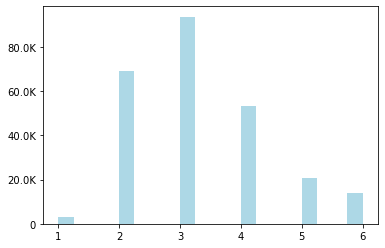

In [58]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, bmiBandAddedDF.select('BMIBand'), bins = 20, color=['lightblue'])

In [59]:
bmiBandAddedDF.toPandas().to_csv('Datasets/03ConstructingNewData.csv')  

In [191]:
fields_A = ['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'BMIBand',
            'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity']
fields_B = ['Fruits', 'Veggies', 'HvyAlcoholConsump',
            'Sex', 'Age', 'Education', 'Income']
bmiBandAddedDF.toPandas().to_csv('Datasets/Data Integration/DS-A.csv', columns = fields_A ,index=True, index_label='ID')
bmiBandAddedDF.toPandas().to_csv('Datasets/Data Integration/DS-B.csv', columns = fields_B ,index=True, index_label='ID')

In [192]:
df_A = spark.read.csv('Datasets/Data Integration/DS-A.csv', inferSchema=True, header=True)
df_A.show()

+---+------------+------+--------+---+-------+------+------+--------------------+------------+
| ID|Diabetes_012|HighBP|HighChol|BMI|BMIBand|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|
+---+------------+------+--------+---+-------+------+------+--------------------+------------+
|  0|           0|     1|       1| 40|      6|     1|     0|                   0|           0|
|  1|           0|     0|       0| 25|      3|     1|     0|                   0|           1|
|  2|           0|     1|       1| 28|      3|     0|     0|                   0|           0|
|  3|           0|     1|       0| 27|      3|     0|     0|                   0|           1|
|  4|           0|     1|       1| 24|      2|     0|     0|                   0|           1|
|  5|           0|     1|       1| 25|      3|     1|     0|                   0|           1|
|  6|           0|     1|       0| 30|      4|     1|     0|                   0|           0|
|  7|           0|     1|       1| 25|      3|    

In [193]:
df_B = spark.read.csv('Datasets/Data Integration/DS-B.csv', inferSchema=True, header=True)
df_B.show()

+---+------+-------+-----------------+---+---+---------+------+
| ID|Fruits|Veggies|HvyAlcoholConsump|Sex|Age|Education|Income|
+---+------+-------+-----------------+---+---+---------+------+
|  0|     0|      1|                0|  0|  9|        4|     3|
|  1|     0|      0|                0|  0|  7|        6|     1|
|  2|     1|      0|                0|  0|  9|        4|     8|
|  3|     1|      1|                0|  0| 11|        3|     6|
|  4|     1|      1|                0|  0| 11|        5|     4|
|  5|     1|      1|                0|  1| 10|        6|     8|
|  6|     0|      0|                0|  0|  9|        6|     7|
|  7|     0|      1|                0|  0| 11|        4|     4|
|  8|     1|      1|                0|  0|  9|        5|     1|
|  9|     0|      1|                0|  1|  8|        4|     3|
| 10|     1|      1|                0|  1| 13|        6|     8|
| 11|     1|      1|                0|  0| 10|        5|     1|
| 12|     0|      1|                0|  

In [194]:
#Using Join expression
mergedDF = df_A.join(df_B,['ID'])
mergedDF.withColumnRenamed("HeartDiseaseorAttack","HDA") \
          .withColumnRenamed("HvyAlcoholConsump","HAC").show()

+---+------------+------+--------+---+-------+------+------+---+------------+------+-------+---+---+---+---------+------+
| ID|Diabetes_012|HighBP|HighChol|BMI|BMIBand|Smoker|Stroke|HDA|PhysActivity|Fruits|Veggies|HAC|Sex|Age|Education|Income|
+---+------------+------+--------+---+-------+------+------+---+------------+------+-------+---+---+---+---------+------+
|  0|           0|     1|       1| 40|      6|     1|     0|  0|           0|     0|      1|  0|  0|  9|        4|     3|
|  1|           0|     0|       0| 25|      3|     1|     0|  0|           1|     0|      0|  0|  0|  7|        6|     1|
|  2|           0|     1|       1| 28|      3|     0|     0|  0|           0|     1|      0|  0|  0|  9|        4|     8|
|  3|           0|     1|       0| 27|      3|     0|     0|  0|           1|     1|      1|  0|  0| 11|        3|     6|
|  4|           0|     1|       1| 24|      2|     0|     0|  0|           1|     1|      1|  0|  0| 11|        5|     4|
|  5|           0|     1

In [119]:
mergedDF.toPandas().to_csv('Datasets/Data Integration/DS-Merged.csv', index=False)  

In [195]:
sortedDF = mergedDF.sort(mergedDF.Diabetes_012.asc(),mergedDF.ID.asc()) \
        .withColumnRenamed("HeartDiseaseorAttack","HDA") \
        .withColumnRenamed("HvyAlcoholConsump","HAC")
sortedDF.show(10)

+---+------------+------+--------+---+-------+------+------+---+------------+------+-------+---+---+---+---------+------+
| ID|Diabetes_012|HighBP|HighChol|BMI|BMIBand|Smoker|Stroke|HDA|PhysActivity|Fruits|Veggies|HAC|Sex|Age|Education|Income|
+---+------------+------+--------+---+-------+------+------+---+------------+------+-------+---+---+---+---------+------+
|  0|           0|     1|       1| 40|      6|     1|     0|  0|           0|     0|      1|  0|  0|  9|        4|     3|
|  1|           0|     0|       0| 25|      3|     1|     0|  0|           1|     0|      0|  0|  0|  7|        6|     1|
|  2|           0|     1|       1| 28|      3|     0|     0|  0|           0|     1|      0|  0|  0|  9|        4|     8|
|  3|           0|     1|       0| 27|      3|     0|     0|  0|           1|     1|      1|  0|  0| 11|        3|     6|
|  4|           0|     1|       1| 24|      2|     0|     0|  0|           1|     1|      1|  0|  0| 11|        5|     4|
|  5|           0|     1

In [123]:
sortedDF.toPandas().to_csv('Datasets/03DataPreparation.csv', index=False)  

In [196]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=sortedDF.columns, outputCol=vector_col)
df_vector = assembler.transform(sortedDF).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)
matrix.collect()[0]["pearson({})".format(vector_col)].values

array([ 1.        ,  0.00328202,  0.00168451, -0.00390493,  0.00293234,
        0.01122904, -0.01162679, -0.002928  ,  0.00461922, -0.01322717,
       -0.01173163, -0.00257867, -0.00525875,  0.00206833, -0.01556881,
       -0.02761987, -0.03155595,  0.00328202,  1.        ,  0.27158947,
        0.20909975,  0.22430791,  0.23606119,  0.06290692,  0.10717507,
        0.18023729, -0.12193618, -0.04218039, -0.05897375, -0.05789029,
        0.03106055,  0.18502647, -0.13052335, -0.1714926 ,  0.00168451,
        0.27158947,  1.        ,  0.29822147,  0.2136804 ,  0.22969833,
        0.09700445,  0.12957542,  0.20935125, -0.125237  , -0.04053613,
       -0.06126417, -0.00397816,  0.05224593,  0.34444767, -0.1413384 ,
       -0.17120615, -0.00390493,  0.20909975,  0.29822147,  1.        ,
        0.10667268,  0.11768162,  0.09131421,  0.09263134,  0.18077313,
       -0.07804424, -0.04089984, -0.03987693, -0.01153571,  0.03122772,
        0.27231267, -0.07082963, -0.08545898,  0.00293234,  0.22

In [244]:
import pandas as pd
finalDF = spark.read.csv('Datasets/03DataPreparation.csv', inferSchema=True, header=True).toPandas()
pd.set_option('display.max_columns', 16)
finalDF.corr()

,ID,Diabetes_012,HighBP,HighChol,BMI,BMIBand,Smoker,Stroke,...,PhysActivity,Fruits,Veggies,HAC,Sex,Age,Education,Income
ID,1.000000,0.003282,0.001685,-0.003905,0.002932,0.011229,-0.011627,-0.002928,...,-0.013227,-0.011732,-0.002579,-0.005259,0.002068,-0.015569,-0.027620,-0.031556
Diabetes_012,0.003282,1.000000,0.271589,0.209100,0.224308,0.236061,0.062907,0.107175,...,-0.121936,-0.042180,-0.058974,-0.057890,0.031061,0.185026,-0.130523,-0.171493
HighBP,0.001685,0.271589,1.000000,0.298221,0.213680,0.229698,0.097004,0.129575,...,-0.125237,-0.040536,-0.061264,-0.003978,0.052246,0.344448,-0.141338,-0.171206
HighChol,-0.003905,0.209100,0.298221,1.000000,0.106673,0.117682,0.091314,0.092631,...,-0.078044,-0.040900,-0.039877,-0.011536,0.031228,0.272313,-0.070830,-0.085459
BMI,0.002932,0.224308,0.213680,0.106673,1.000000,0.917015,0.013758,0.020134,...,-0.147229,-0.087557,-0.062250,-0.048743,0.042903,-0.036660,-0.103895,-0.100037
BMIBand,0.011229,0.236061,0.229698,0.117682,0.917015,1.000000,0.017706,0.021969,...,-0.151188,-0.092063,-0.065647,-0.051006,0.048303,-0.029359,-0.111387,-0.100328
Smoker,-0.011627,0.062907,0.097004,0.091314,0.013758,0.017706,1.000000,0.061176,...,-0.087386,-0.077675,-0.030688,0.101625,0.093702,0.120649,-0.161946,-0.123943
Stroke,-0.002928,0.107175,0.129575,0.092631,0.020134,0.021969,0.061176,1.000000,...,-0.069155,-0.013390,-0.041123,-0.016955,0.002982,0.126976,-0.076017,-0.128613
HDA,0.004619,0.180237,0.209351,0.180773,0.052871,0.058323,0.114435,0.203004,...,-0.087282,-0.019775,-0.039171,-0.028995,0.086120,0.221618,-0.099600,-0.141013
PhysActivity,-0.013227,-0.121936,-0.125237,-0.078044,-0.147229,-0.151188,-0.087386,-0.069155,...,1.000000,0.142736,0.153180,0.012393,0.032462,-0.092502,0.199650,0.198496


Text(0.5, 1.0, 'correlation of feature')

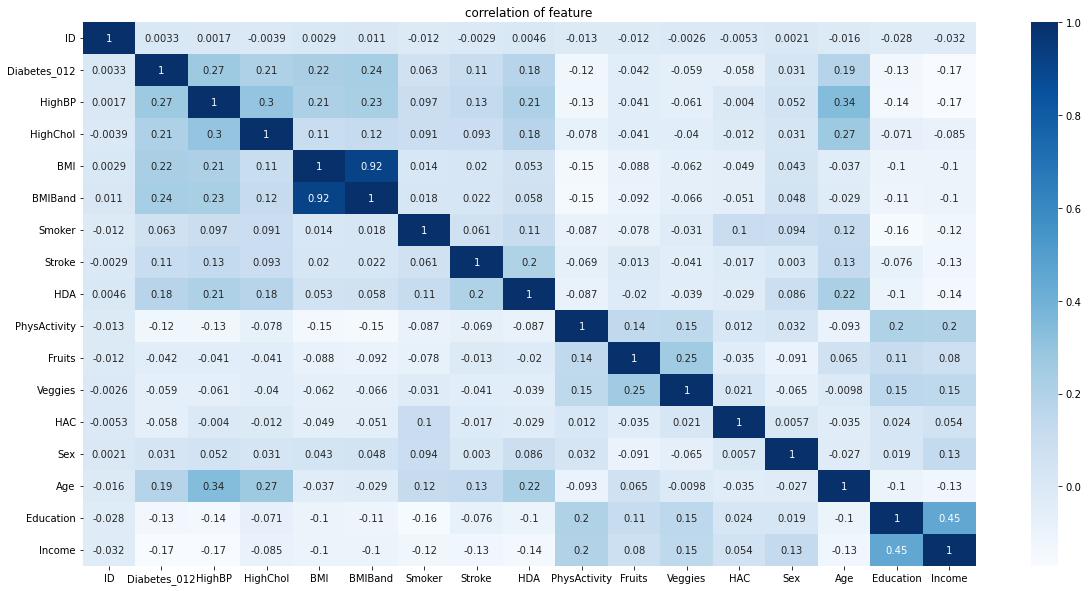

In [224]:
corr =finalDF.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot=True , cmap ='Blues' )
plt.title("correlation of feature")

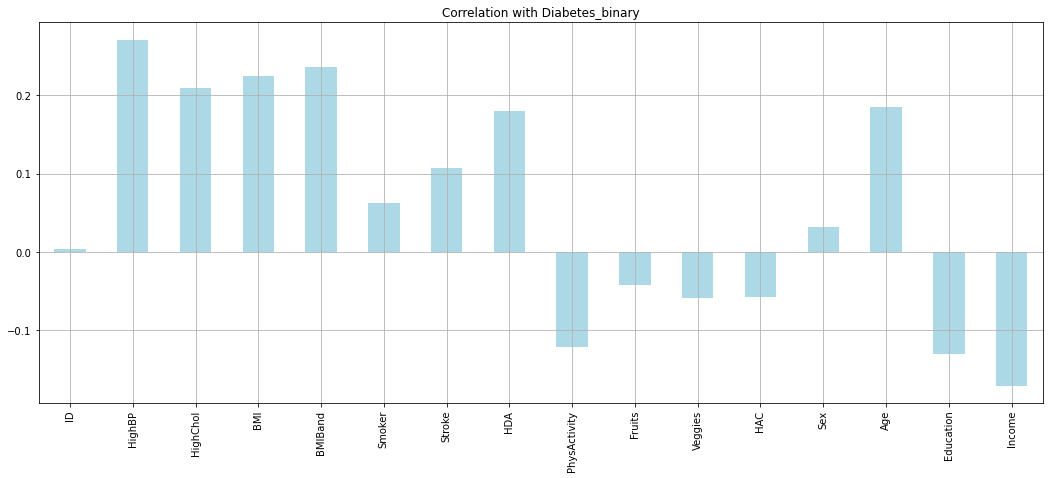

In [245]:
finalDF.drop('Diabetes_012', axis=1).corrwith(finalDF.Diabetes_012).plot(kind='bar',
                                                               grid=True, 
                                                               figsize=(18, 7), 
                                                               title="Correlation with Diabetes_binary",color="lightblue");

array([[<AxesSubplot:title={'center':'Diabetes_012'}>]], dtype=object)

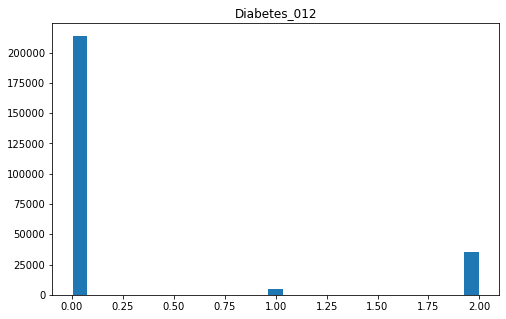

In [226]:
finalDF.hist(column='Diabetes_012', bins=25, grid=False, figsize=(8,5), zorder=2, rwidth=0.9)

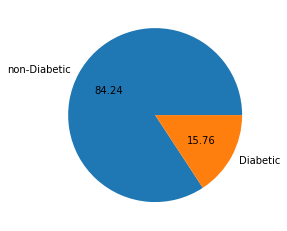

In [227]:
finalDF['Diabetes_012'] = finalDF['Diabetes_012'].replace(2,1)
finalDF.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)
plt.pie(finalDF["Diabetes_binary"].value_counts() 
        , labels =["non-Diabetic","Diabetic"] ,autopct='%.02f' );

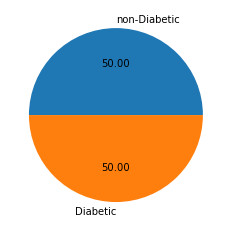

In [232]:
reducedDF = finalDF.groupby('Diabetes_binary')
reducedDF = pd.DataFrame(reducedDF.apply(lambda x: x.sample(reducedDF.size().min())
                                         .reset_index(drop=True)))
plt.pie(reducedDF["Diabetes_binary"].value_counts() 
        , labels =["non-Diabetic","Diabetic"] ,autopct='%.02f' );

In [243]:
display(reducedDF)
reducedDF.rename(columns={'HDA': 'HeartDiseaseorAttack'}, inplace=True) \
        .rename(columns={'HAC': 'HvyAlcoholConsump'}, inplace=True) \
        .to_csv('Datasets/04DataTransformation.csv')

ID  Diabetes_binary  HighBP  HighChol  BMI  \
Diabetes_binary                                                         
0               0      131805                0       1         0   42   
                1      229519                0       0         0   23   
                2      125271                0       0         1   25   
                3      183133                0       0         0   24   
                4      198610                0       1         1   27   
...                       ...              ...     ...       ...  ...   
1               39971  110366                1       0         0   18   
                39972  138511                1       1         1   33   
                39973   36771                1       1         1   34   
                39974  172306                1       1         0   33   
                39975  184021                1       0         0   31   

                       BMIBand  Smoker  Stroke  ...  PhysActivity  Fruits  \
Diabetes_binary                                 ...                         
0               0            6       0       1  ...             0       1   
                1            2       0       0  ...             1       1   
                2            3       1       0  ...             1       0   
                3            2       1       0  ...             1       1   
                4            3       0       0  ...             1       0   
...                        ...     ...     ...  ...           ...     ...   
1               39971        1       1       0  ...             1       1   
                39972        4       0       0  ...             1       1   
                39973        4       0       0  ...             0       1   
                39974        4       0       0  ...             1       0   
                39975        4       0       0  ...             0       0   

                       Veggies  HAC  Sex  Age  Education  Income  
Diabetes_binary                                                   
0               0            0    0    0   12          2       2  
                1            1    0    0    9          5       7  
                2            0    0    1   12          5       7  
                3            1    0    1   12          6       5  
                4            1    0    1    5          5       7  
...                        ...  ...  ...  ...        ...     ...  
1               39971        1    0    0   13          5       5  
                39972        0    0    0   11          4       3  
                39973        1    0    0    9          3       3  
                39974        1    0    0    9          5       7  
                39975        1    0    1   10          6       8  

[79952 rows x 17 columns]

AttributeError: 'NoneType' object has no attribute 'rename'

<AxesSubplot:title={'center':'Age'}>

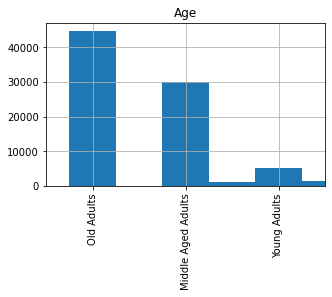

In [239]:
finalDF = pd.read_csv('Datasets/04DataTransformation.csv')
finalDF.hist(column='Age', bins=13, grid=False, figsize=(5,3), zorder=1, rwidth=0.9)
def AgeGroup(row):
    if row["Age"] >= 1 and row["Age"] < 4:
        return 'Young Adults'
    elif row["Age"] >= 4 and row["Age"] < 9:
        return 'Middle Aged Adults'
    elif row["Age"] >= 9:
        return 'Old Adults'
finalDF['AgeGroup'] = finalDF.apply(lambda row: AgeGroup(row), axis=1)
finalDF.AgeGroup.value_counts().plot(kind='bar')
finalDF.AgeGroup.value_counts().hist()

<AxesSubplot:>

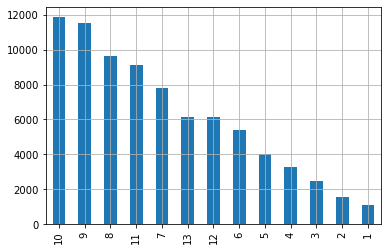

In [241]:
finalDF.Age.value_counts().plot(kind='bar')
finalDF.Age.value_counts().hist()